<a href="https://colab.research.google.com/github/Matteomtt/exercice-prise-en-main/blob/main/Exercice4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Step 1 / MobileNetV2

In [2]:
import io
import pandas as pd
from google.colab import files

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers


In [7]:
from google.colab import drive
drive.mount ('/content/gdrive',force_remount=True)

Mounted at /content/gdrive


In [13]:
import os
os.chdir('/content/gdrive/MyDrive/wetransfer_cats_and_dogs_2023-05-04_2110')


In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen =  ImageDataGenerator(
    validation_split=0.15,
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    preprocessing_function=preprocess_input,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

train_generator = train_datagen.flow_from_directory(
        f'cats_and_dogs/train',
        target_size=(300, 300),
        batch_size=16,
        shuffle=True)

test_generator = test_datagen.flow_from_directory(
        f'cats_and_dogs/test',
        target_size=(300, 300),
        batch_size=16,
        shuffle=False)


Found 557 images belonging to 2 classes.
Found 140 images belonging to 2 classes.


In [28]:
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.layers import Flatten
from keras.layers import Dense
from keras.models import Model

# Load pre-trained CNN - Here VGG16 trained on image-net dataset
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(300, 300, 3))

# Freeze all layers of the pre-trained model
for layer in base_model.layers:
    layer.trainable = False

x = base_model.output
x = Flatten()(x)
x = Dense(100, activation='relu')(x)
predictions = Dense(2, activation='softmax', kernel_initializer='random_uniform')(x)

# Build model
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [29]:
import matplotlib.pyplot as plt

# Train the model
history = model.fit_generator(
    train_generator,
    steps_per_epoch=train_generator.n // train_generator.batch_size,
    epochs=10,
    validation_data=test_generator,
    validation_steps=test_generator.n // test_generator.batch_size)

# Plot accuracy and loss curves
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()


import numpy as np
from sklearn.metrics import confusion_matrix

# Generate predictions for test set
y_pred = model.predict(test_generator)

# Convert predictions to class labels
y_pred_labels = np.argmax(y_pred, axis=1)
true_labels = test_generator.classes

# Compute confusion matrix
conf_mat = confusion_matrix(true_labels, y_pred_labels)
print(conf_mat)


from sklearn.metrics import classification_report

# Generate predictions for test set
y_pred = model.predict(test_generator)

# Convert predictions to class labels
y_pred_labels = np.argmax(y_pred, axis=1)
true_labels = test_generator.classes

# Print classification report
class_names = list(test_generator.class_indices.keys())
print(classification_report(true_labels, y_pred_labels, target_names=class_names))


<ipython-input-29-9ebeb48f2493>:4: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/10
34/34 [==============================] - 708s 21s/step - loss: 1.8924 - accuracy: 0.8614 - val_loss: 0.6180 - val_accuracy: 0.9297
Epoch 2/10
34/34 [==============================] - 703s 21s/step - loss: 0.1619 - accuracy: 0.9667 - val_loss: 0.3473 - val_accuracy: 0.9297
Epoch 3/10
34/34 [==============================] - ETA: 0s - loss: 0.0663 - accuracy: 0.9815 

KeyboardInterrupt: ignored

Found 475 images belonging to 2 classes.
Found 82 images belonging to 2 classes.
Found 140 images belonging to 2 classes.
9406464/9406464 [==============================] - 0s 0us/step
Epoch 1/10
30/30 [==============================] - 45s 1s/step - loss: 0.2394 - accuracy: 0.8968 - val_loss: 0.1153 - val_accuracy: 0.9512
Epoch 2/10
30/30 [==============================] - 39s 1s/step - loss: 0.0813 - accuracy: 0.9684 - val_loss: 0.1720 - val_accuracy: 0.9512
Epoch 3/10
30/30 [==============================] - 33s 1s/step - loss: 0.0462 - accuracy: 0.9789 - val_loss: 0.1248 - val_accuracy: 0.9512
Epoch 4/10
30/30 [==============================] - 34s 1s/step - loss: 0.0303 - accuracy: 0.9853 - val_loss: 0.0561 - val_accuracy: 0.9756
Epoch 5/10
30/30 [==============================] - 35s 1s/step - loss: 0.0288 - accuracy: 0.9853 - val_loss: 0.1380 - val_accuracy: 0.9634
Epoch 6/10
30/30 [==============================] - 34s 1s/step - loss: 0.0315 - accuracy: 0.9895 - val_loss: 0.198

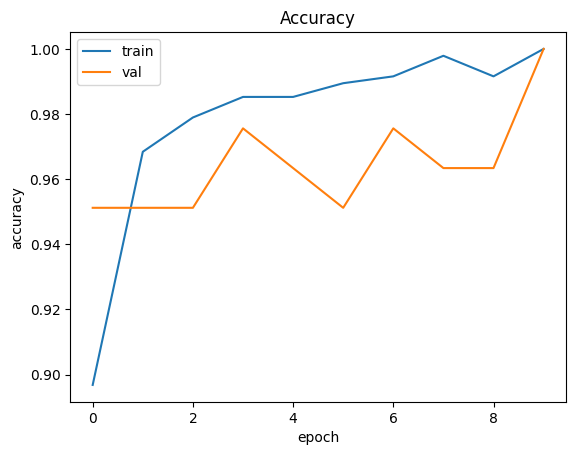

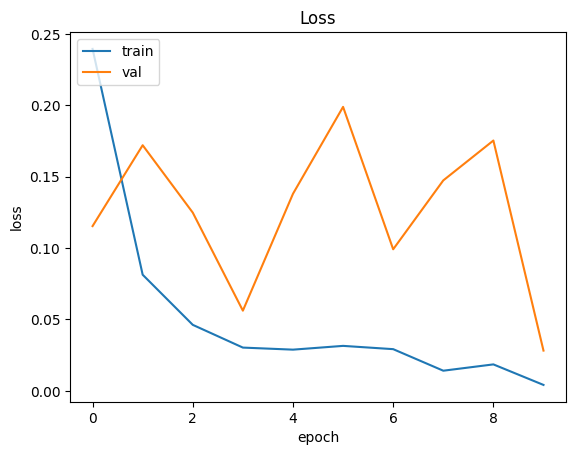

In [30]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2, preprocess_input
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

# Create data generators
train_datagen = ImageDataGenerator(
    validation_split=0.15,
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    preprocessing_function=preprocess_input,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

train_generator = train_datagen.flow_from_directory(
        'cats_and_dogs/train',
        target_size=(224, 224),
        batch_size=16,
        class_mode='categorical',
        shuffle=True,
        subset='training')

val_generator = train_datagen.flow_from_directory(
        'cats_and_dogs/train',
        target_size=(224, 224),
        batch_size=16,
        class_mode='categorical',
        shuffle=False,
        subset='validation')

test_generator = test_datagen.flow_from_directory(
        'cats_and_dogs/test',
        target_size=(224, 224),
        batch_size=16,
        class_mode='categorical',
        shuffle=False)

# Load pre-trained MobileNetV2
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze all layers of the pre-trained model
for layer in base_model.layers:
    layer.trainable = False

# Add new classification layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
predictions = Dense(2, activation='softmax')(x)

# Build model
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(train_generator, 
                    epochs=10, 
                    verbose=1, 
                    validation_data=val_generator)

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_generator)
print(f'Test Loss: {test_loss}, Test Accuracy: {test_acc}')

# Generate predictions for the test set
y_true = test_generator.classes
y_pred = model.predict(test_generator)
y_pred = np.argmax(y_pred, axis=1)

# Print classification report and confusion matrix
print('Classification Report:')
print(classification_report(y_true, y_pred))
print('Confusion Matrix:')
print(confusion_matrix(y_true, y_pred))

# Plot accuracy and loss curves
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()


Step 2 / DenseNet12

Found 557 images belonging to 2 classes.
Found 82 images belonging to 2 classes.
Found 140 images belonging to 2 classes.
Epoch 1/10
35/35 [==============================] - 206s 6s/step - loss: 0.6562 - accuracy: 0.8779 - val_loss: 0.0697 - val_accuracy: 0.9878
Epoch 2/10
35/35 [==============================] - 212s 6s/step - loss: 0.1007 - accuracy: 0.9677 - val_loss: 0.0865 - val_accuracy: 0.9512
Epoch 3/10
35/35 [==============================] - 212s 6s/step - loss: 0.0632 - accuracy: 0.9856 - val_loss: 0.0432 - val_accuracy: 0.9756
Epoch 4/10
35/35 [==============================] - 210s 6s/step - loss: 0.0225 - accuracy: 0.9892 - val_loss: 0.0107 - val_accuracy: 0.9878
Epoch 5/10
35/35 [==============================] - 212s 6s/step - loss: 0.0198 - accuracy: 0.9964 - val_loss: 0.0016 - val_accuracy: 1.0000
Epoch 6/10
35/35 [==============================] - 212s 6s/step - loss: 0.0188 - accuracy: 0.9928 - val_loss: 1.2336e-04 - val_accuracy: 1.0000
Epoch 7/10
35/35 [==========

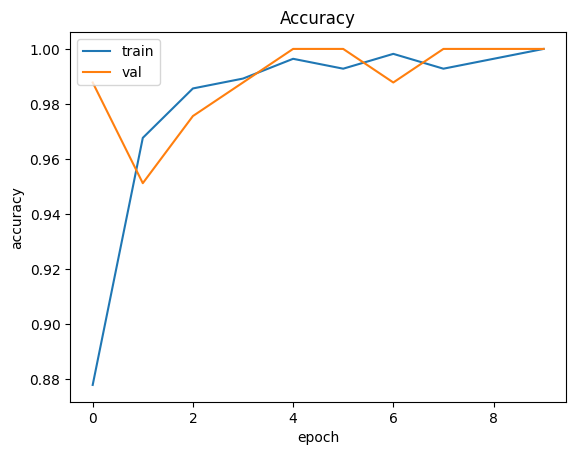

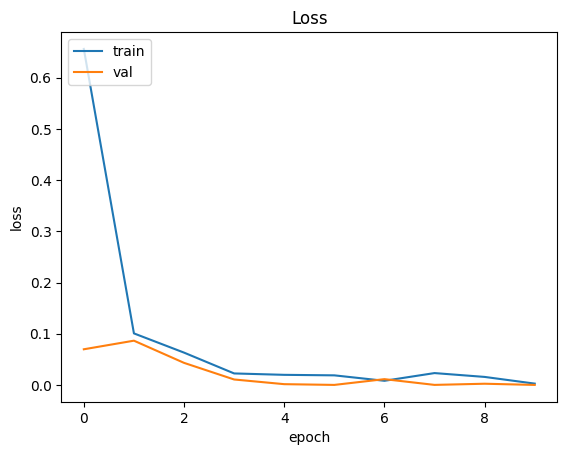

In [14]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.applications.densenet import DenseNet121, preprocess_input
from sklearn.metrics import classification_report, confusion_matrix
from keras.layers import Flatten, Dense
from keras.models import Model
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense

train_datagen = ImageDataGenerator(
    validation_split=0.15,
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    preprocessing_function=preprocess_input,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

train_generator = train_datagen.flow_from_directory(
    'cats_and_dogs/train',
    target_size=(300, 300),
    batch_size=16,
    shuffle=True)

val_generator = train_datagen.flow_from_directory(
        'cats_and_dogs/train',
        target_size=(300, 300),
        batch_size=16,
        class_mode='categorical',
        shuffle=False,
        subset='validation')

test_generator = test_datagen.flow_from_directory(
    'cats_and_dogs/test',
    target_size=(300, 300),
    batch_size=16,
    shuffle=False)

# Load pre-trained CNN - Here DenseNet121 trained on image-net dataset
base_model = DenseNet121(weights='imagenet', include_top=False, input_shape=(300, 300, 3))

# Freeze all layers of the pre-trained model
for layer in base_model.layers:
    layer.trainable = False

x = base_model.output
x = Flatten()(x)
x = Dense(100, activation='relu')(x)
predictions = Dense(2, activation='softmax', kernel_initializer='random_uniform')(x)

# Build model
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


# Train the model
history = model.fit(train_generator,
                    epochs=10, 
                    verbose=1, 
                    validation_data=val_generator)

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_generator)
print(f'Test Loss: {test_loss}, Test Accuracy: {test_acc}')

# Generate predictions for the test set
y_true = test_generator.classes
y_pred = model.predict(test_generator)
y_pred = np.argmax(y_pred, axis=1)

# Print classification report and confusion matrix
print('Classification Report:')
print(classification_report(y_true, y_pred))
print('Confusion Matrix:')
print(confusion_matrix(y_true, y_pred))

# Plot accuracy and loss curves
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()


Le modèle MobileNetV2 est un modèle plus rapide car moins lourd et moins profond. Il est donc une bonne option si l'on a des contraintes de puissance de calcul ou de mémoire, ou bien si on doit traiter du temps réel.

Le DenseNet121 est quant à lui plus profond et plus complexe avec davantage de paramètres à entrainer. Par conséquant on peut observer sur les résultats obtenus que l'on obtient une précision plus grande (égale à 1 dans certains cas) et moins d'erreurs sur la matrice de confusion, même pour des jeux de données plus grands et plus complexes, et pour des images de haute résolution. Cependant il est plus lent.

Cependant, les deux modèles ont une très bonne précision.

Par conséquent, le choix du meilleur modèle entre les deux dépend de la spécifité de notre projet, des objectifs visés en terme de vitesse, précision par exemple. Cela dépend donc des cas dans lesquels on se trouve. Il faut également tester ces deux modèles sur notre cas pour voir lequel est le plus probant.